In [3]:
#install.packages('tseries')
#install.packages('CombMSC')
library(CombMSC)
library(tseries)
library(zoo)


spy = get.hist.quote(instrument = "^GSPC", "2000-01-04", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 504

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test




time series ends   2011-12-30


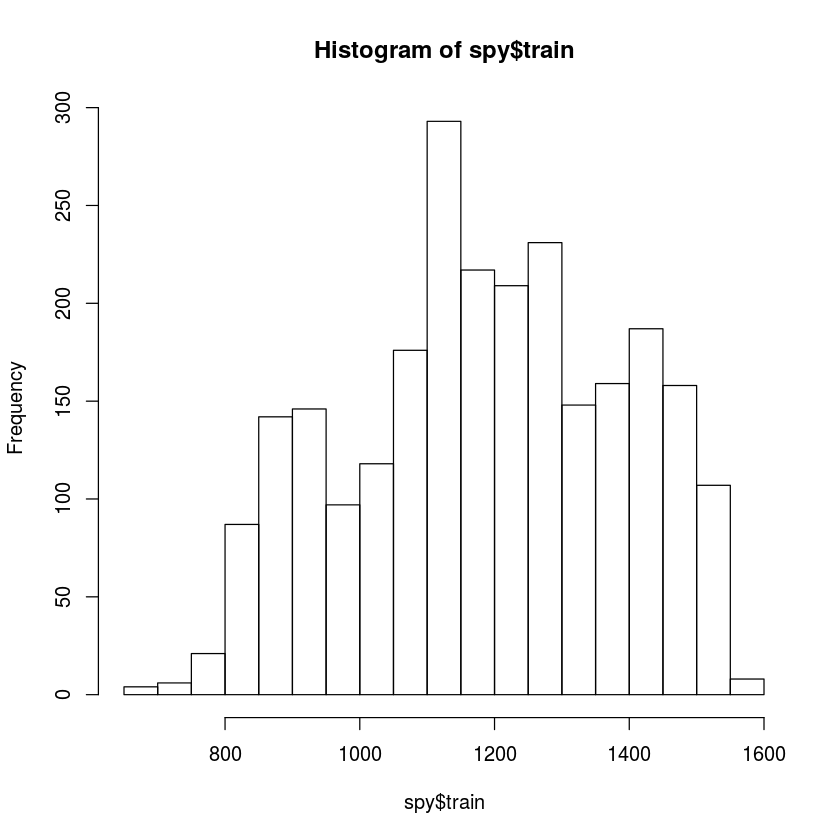

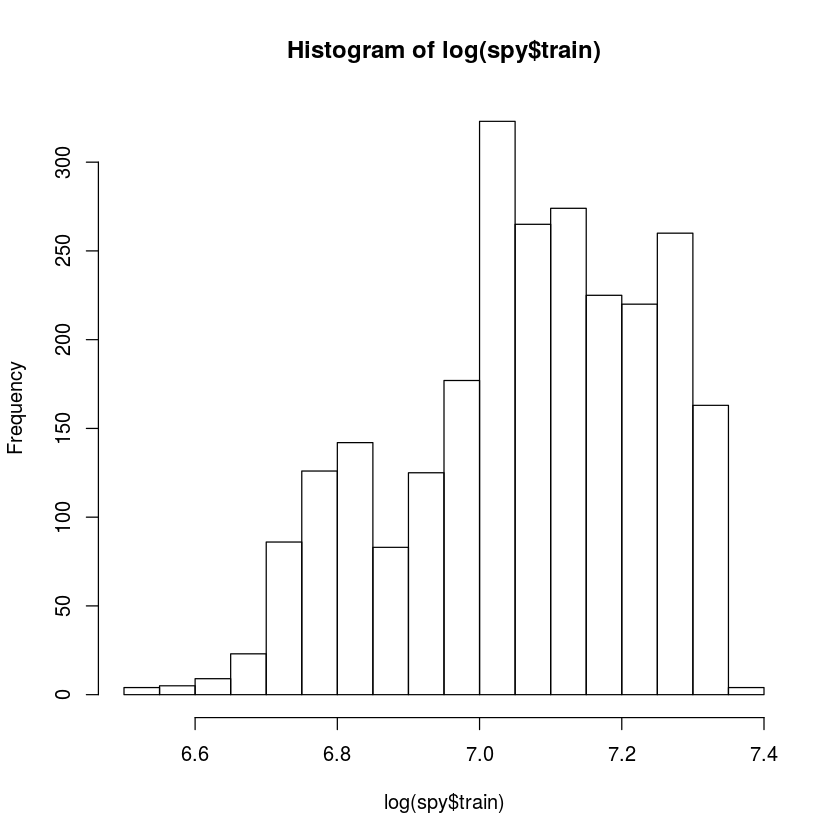

In [4]:
hist(spy$train)
hist(log(spy$train))

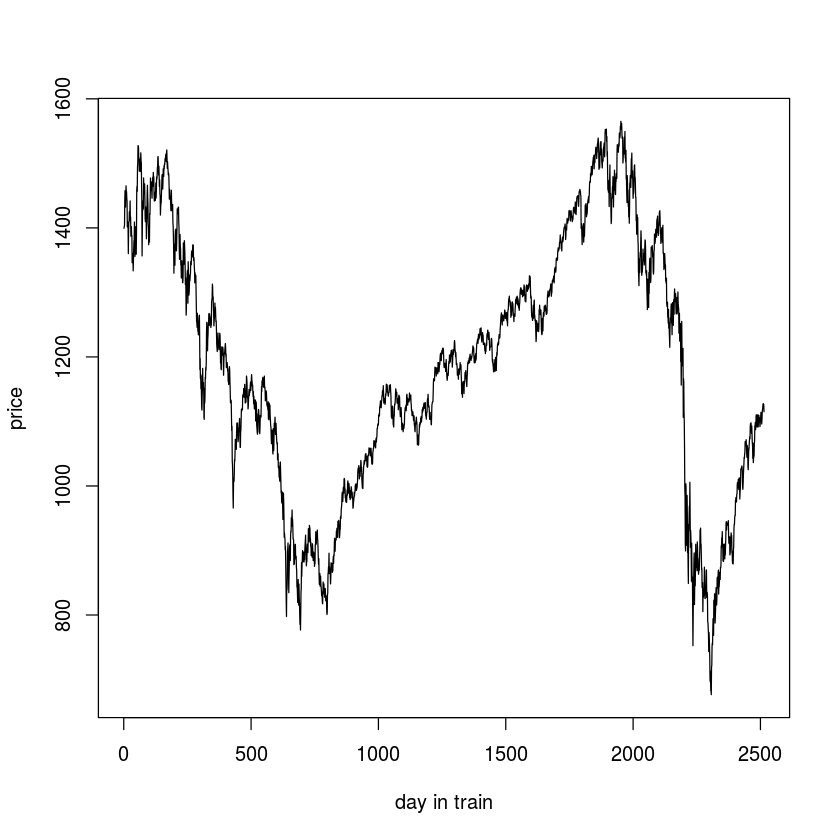

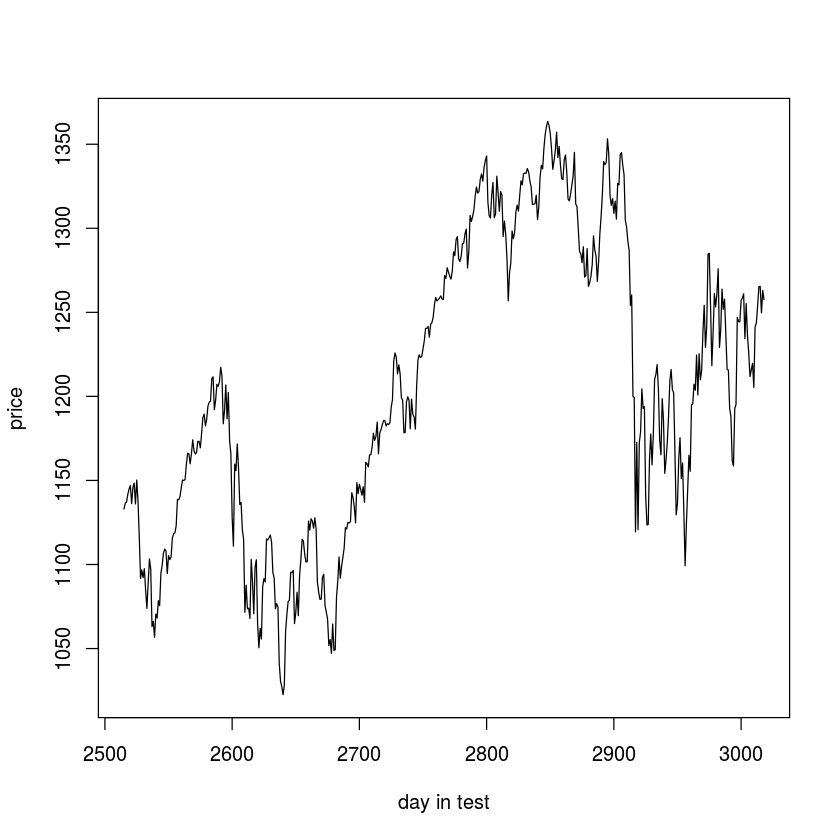

In [5]:
plot(spy$train,ylab='price', xlab='day in train')

plot.ts(spy$test,ylab='price', xlab='day in test')

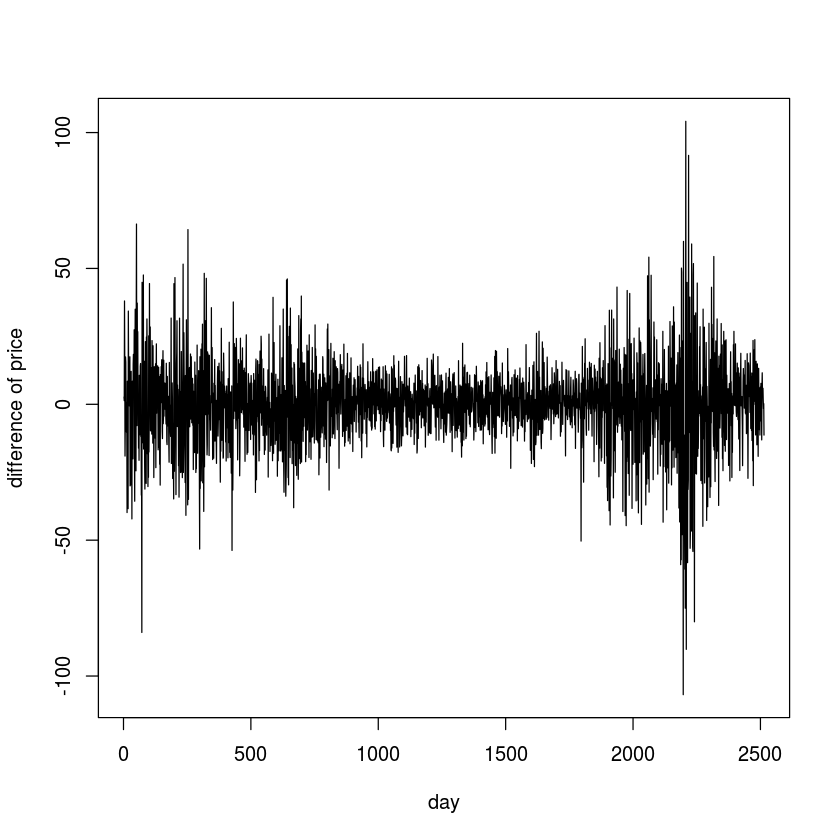

In [6]:
spy$train_diff = diff(spy$train)

plot.ts(spy$train_diff,ylab="difference of price", xlab="day")



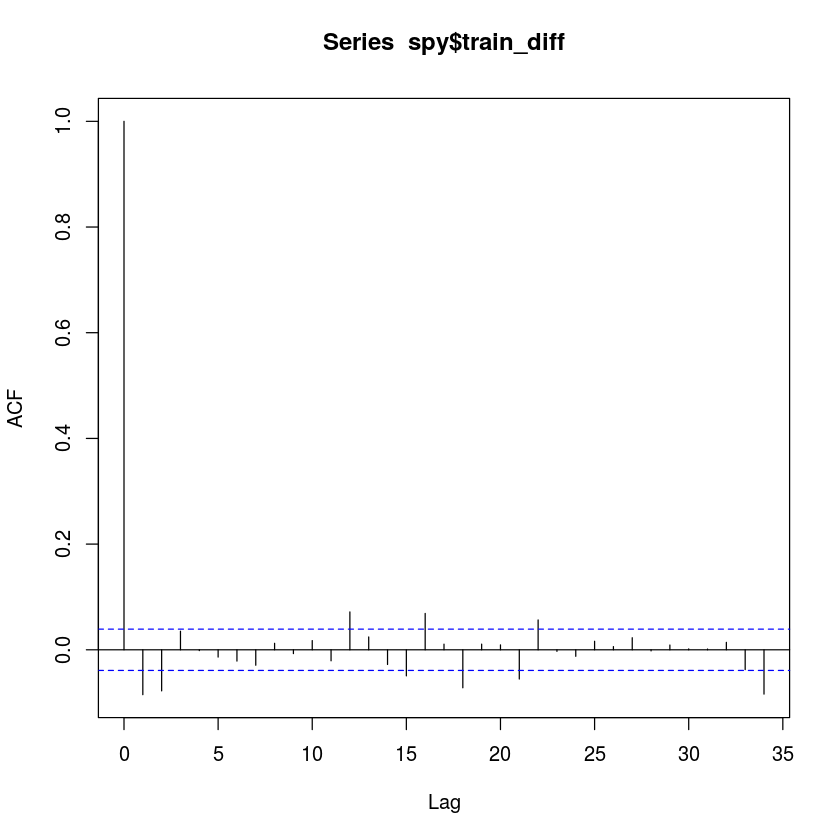

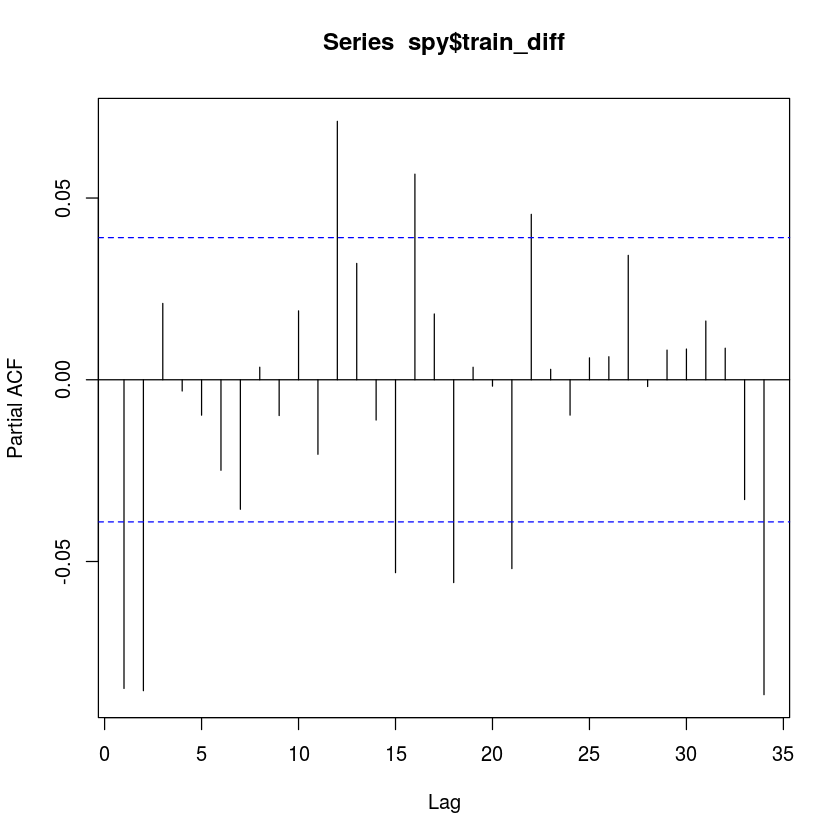

In [7]:
#adf.test(spy$train_diff)
acf(spy$train_diff, na.action= na.pass)
pacf(spy$train_diff, na.action= na.pass)

In [8]:
library(TSA)



eacf(spy$train_diff)

#spy$train_diff

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-16. For overview type 'help("mgcv-package")'.

Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  x  o  o 
1 x x o o o o o o o o o  x  x  o 
2 x o x o o o o o o o o  x  o  o 
3 x x o o o o o o o o o  x  o  o 
4 x o x o o x o o o o o  o  o  o 
5 x x o o x o o o o o o  o  o  o 
6 x x o x x o o o o o o  o  o  o 
7 x x x x x x o o o o o  o  o  o 


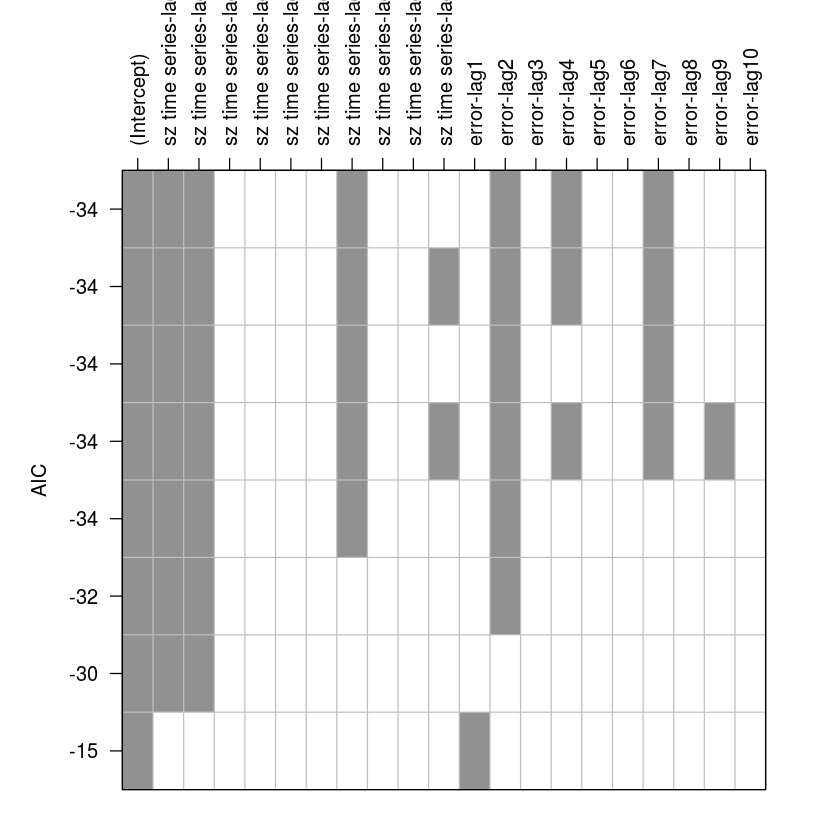

In [9]:
subsets = armasubsets(spy$train_diff, nar=10, nma=10, y.name = "sz time series", ar.method='ols' )
plot(subsets,scale = "AIC")


Attaching package: ‘forecast’

The following objects are masked from ‘package:TSA’:

    fitted.Arima, plot.Arima

The following object is masked from ‘package:nlme’:

    getResponse



Series: spy$train 
ARIMA(2,1,2)                    

Coefficients:
          ar1      ar2     ma1     ma2
      -0.3045  -0.1407  0.2143  0.0379
s.e.   0.2343   0.1826  0.2357  0.1934

sigma^2 estimated as 228.3:  log likelihood=-10387.29
AIC=20784.58   AICc=20784.6   BIC=20813.73

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.1293145,15.09377,10.60439,-0.02124017,0.9370935,0.9957709,-0.000124045,NA
Test set,49.5751254,93.63405,71.43383,3.81767104,5.8630020,6.7077598,0.982666018,6.853472


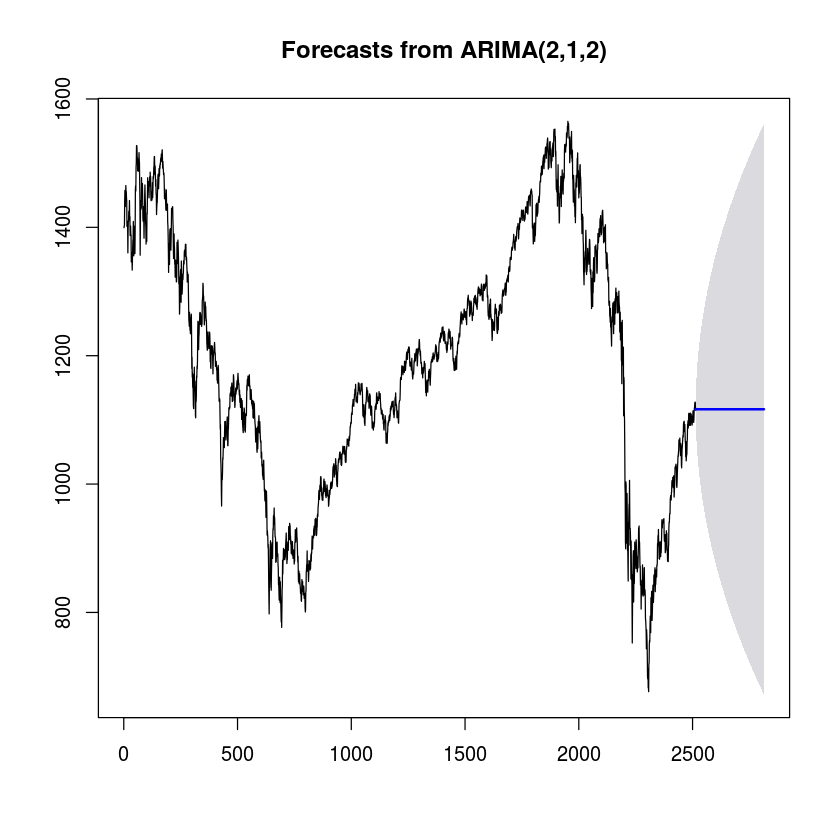

In [10]:
library(forecast)
fit1 = Arima(spy$train, order=c(2,1,2))
fit1


fit1_forecast = forecast(fit1, h=300,level=c(0.95))
accuracy(fit1_forecast, spy$test)
plot(fit1_forecast)

Series: spy$train 
ARIMA(7,1,7)                    

Coefficients:
          ar1     ar2      ar3     ar4      ar5      ar6      ar7      ma1
      -0.0121  0.3052  -0.1823  0.5035  -0.2763  -0.6473  -0.1084  -0.0796
s.e.   0.1830  0.1813   0.1837  0.0946   0.1149   0.1528   0.1854   0.1834
          ma2     ma3      ma4     ma5     ma6      ma7
      -0.3848  0.2366  -0.5113  0.2899  0.6434  -0.0092
s.e.   0.1808  0.1956   0.1042  0.1176  0.1557   0.1797

sigma^2 estimated as 226.5:  log likelihood=-10372.79
AIC=20775.58   AICc=20775.77   BIC=20863.02

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.1335275,15.00633,10.57493,-0.02175839,0.934517,0.9930041,-1.934967e-05,NA
Test set,86.0740789,122.49346,99.61271,6.65932023,7.925397,9.3538048,9.833366e-01,7.280758


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): argument "x" is missing, with no default


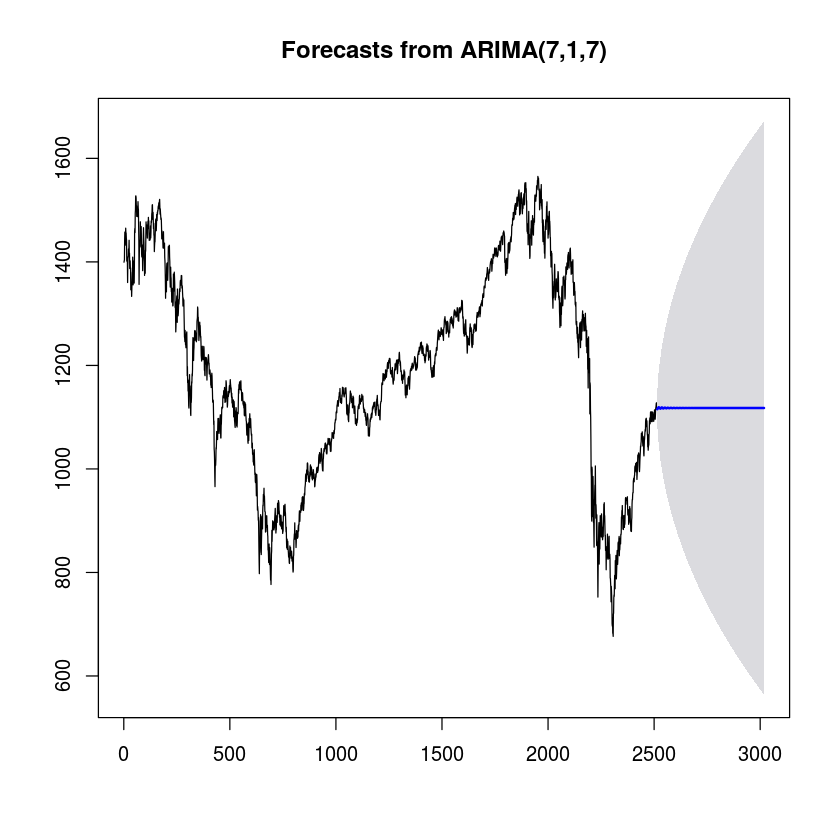

In [11]:
fit2 = Arima(spy$train, order=c(7,1,7))
fit2

fit2_forecast = forecast(fit2, h=test_len,level=c(0.95))
accuracy(fit2_forecast, spy$test)
plot(fit2_forecast)
plot()

In [ ]:
fit3 = Arima(spy$train, order=c(9,1,0))
fit3

fit3_forecast = forecast(fit3, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test)
plot(fit3_forecast)

In [ ]:
fit4 = Arima(spy$train, order=c(0,1,9))
fit4

fit4_forecast = forecast(fit4, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test)
plot(fit4_forecast)

In [ ]:
McLeod.Li.test(y = spy$train_diff) # test if ARCH is reasonable



In [ ]:
shapiro.test(spy$train_diff) # test if the data's normality

In [ ]:
#install.packages('fBasics')
library(fBasics)

skewness(spy$train_diff) # testing for skewness
kurtosis(spy$train_diff)